In [36]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2010_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename)

SchoolGrad_Absences_filename = '../../SchoolData/data_2010_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename)

In [37]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
#dataFields

In [38]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]

In [39]:
JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [40]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    economically_disadvantaged_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [41]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 257075
White Students: 174970
Black Students: 66547
Hispanic Students: 10792
Economically Disadvantaged Students: 125323
Student Graduation percentage: 86
Query used: GRADES_SERVED == "Grades 9-12"


In [42]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 58389
White Students: 31818
Black Students: 21080
Hispanic Students: 3717
Economically Disadvantaged Students: 25883
Student Graduation percentage: 83
Query used: DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [43]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)  
    
def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 40831
White Students: 2938
Black Students: 35239
Hispanic Students: 2187
Economically Disadvantaged Students: 33095
Student Graduation percentage: 74
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [25]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 24962
White Students: 10065
Black Students: 11471
Hispanic Students: 2329
Economically Disadvantaged Students: 12968
Student Graduation percentage: 84
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [26]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 40598
White Students: 26823
Black Students: 10163
Hispanic Students: 2386
Economically Disadvantaged Students: 15667
Student Graduation percentage: 88
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [27]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 148870
White Students: 135144
Black Students: 7868
Hispanic Students: 3886
Economically Disadvantaged Students: 62619
Student Graduation percentage: 89
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [28]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 27859
White Students: 22627
Black Students: 3347
Hispanic Students: 762
Economically Disadvantaged Students: 4016
Student Graduation percentage: 92
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [29]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 83001
White Students: 65489
Black Students: 12427
Hispanic Students: 3285
Economically Disadvantaged Students: 29214
Student Graduation percentage: 89
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [30]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 102171
White Students: 78751
Black Students: 16897
Hispanic Students: 5042
Economically Disadvantaged Students: 56823
Student Graduation percentage: 86
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [31]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 42480
White Students: 7293
Black Students: 33150
Hispanic Students: 1680
Economically Disadvantaged Students: 35270
Student Graduation percentage: 76
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [33]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'economically_disadvantaged_students',  
                       'graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,economically_disadvantaged_students,graduation_pct
0,All_TN_High_Schools,257075.0,174970.0,66547.0,10792.0,125323.0,86.463866
1,TN_Urban_High_Schools,58389.0,31818.0,21080.0,3717.0,25883.0,83.827728
2,TN_High_Schools_with_0-25%_White_Students,40831.0,2938.0,35239.0,2187.0,33095.0,74.315346
3,TN_High_Schools_with_25-50%_White_Students,24962.0,10065.0,11471.0,2329.0,12968.0,84.150300
4,TN_High_Schools_with_50-75%_White_Students,40598.0,26823.0,10163.0,2386.0,15667.0,88.231004
5,TN_High_Schools_with_75-100%_White_Students,148870.0,135144.0,7868.0,3886.0,62619.0,89.817739
6,TN_High_Schools_with_0-25%_Economically_Disadv...,27859.0,22627.0,3347.0,762.0,4016.0,92.577580
7,TN_High_Schools_with_25-50%_Economically_Disad...,83001.0,65489.0,12427.0,3285.0,29214.0,89.522300
8,TN_High_Schools_with_50-75%_Economically_Disad...,102171.0,78751.0,16897.0,5042.0,56823.0,86.307298
9,TN_High_Schools_with_75-100%_Economically_Disa...,42480.0,7293.0,33150.0,1680.0,35270.0,76.923672


In [34]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


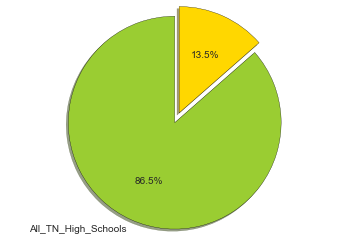

Graduation Percentage:


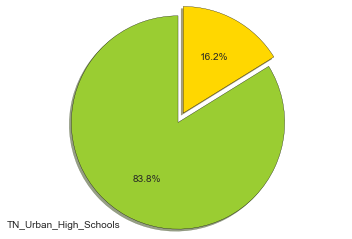

Graduation Percentage:


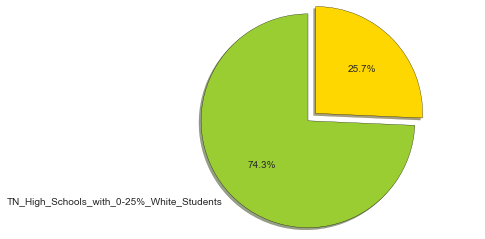

Graduation Percentage:


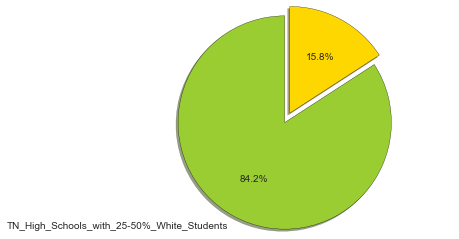

Graduation Percentage:


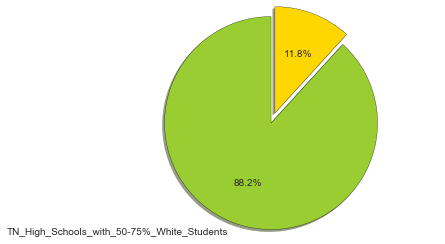

Graduation Percentage:


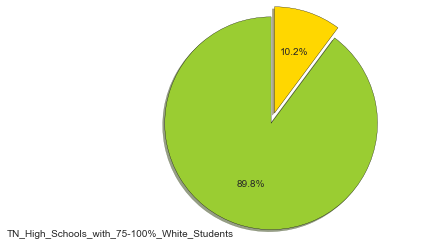

Graduation Percentage:


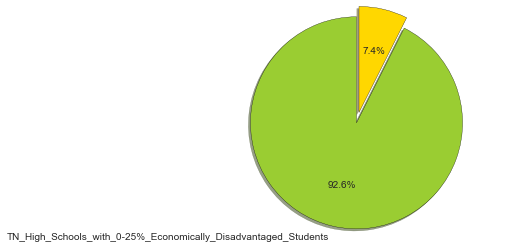

Graduation Percentage:


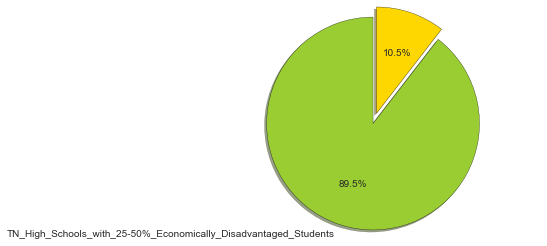

Graduation Percentage:


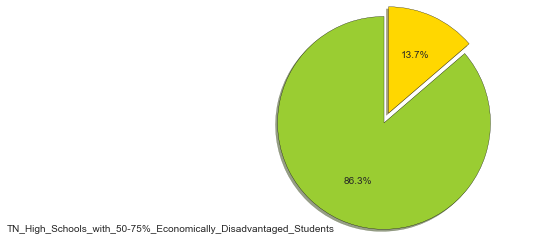

Graduation Percentage:


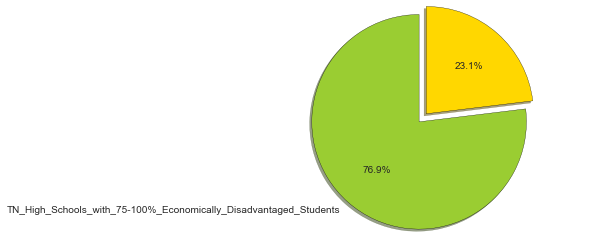

In [35]:
for i in range (0,10):
    GradPctPie(i)